# Graph Property Search Manager

This notebook provides an interface to interact with the graph search scripts in this repository. 
It allows you to:
1.  **Exhaustively search** for triangle-free graphs with property $\Psi_n$.
2.  **Randomly search (Monte Carlo)** for graphs with property $\Psi_n$ (with optional triangle-free constraint).
3.  **Visualize** the results.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import sys
import random

# Ensure the current directory is in the path to import local modules
sys.path.append('.')

# Import from find_triangle_free.py
try:
    from find_triangle_free import check_properties, generate_triangle_free_graphs
    print("Successfully imported 'find_triangle_free' module.")
except ImportError:
    print("Error: Could not import 'find_triangle_free.py'. Ensure it is in the same directory.")

Successfully imported 'find_triangle_free' module.


In [3]:
def draw_graph(G, title="Graph"):
    """Helper function to visualize a NetworkX graph."""
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_weight='bold')
    plt.title(title)
    plt.show()

## 1. Exhaustive Search (Triangle-Free)

This method generates **all** triangle-free graphs of a specific size `k` using recursive backtracking and checks them for property $\Psi_n$.

**Note:** The number of graphs grows exponentially. For $k > 10$, this may take a long time.

In [4]:
def run_exhaustive_search(k, n, limit=1):
    """
    Searches for triangle-free graphs of size k satisfying Psi_n.
    
    Args:
        k (int): Number of vertices.
        n (int): Parameter for property Psi_n.
        limit (int): Max number of graphs to find (0 for all).
    """
    print(f"Searching for triangle-free graphs of size {k} with property Psi_{n}...")
    found = []
    count = 0
    
    # generate_triangle_free_graphs yields graphs
    for G in generate_triangle_free_graphs(k):
        count += 1
        if count % 10000 == 0:
            print(f"Checked {count} graphs...", end='\r')
            
        if check_properties(G, n):
            found.append(G)
            print(f"Found match! (Graph #{len(found)}) at iteration {count}")
            if limit > 0 and len(found) >= limit:
                break
    
    print(f"\nSearch finished. Found {len(found)} graphs satisfying the property.")
    return found

Searching for triangle-free graphs of size 9 with property Psi_1...
Found match! (Graph #1) at iteration 1635972

Search finished. Found 1 graphs satisfying the property.


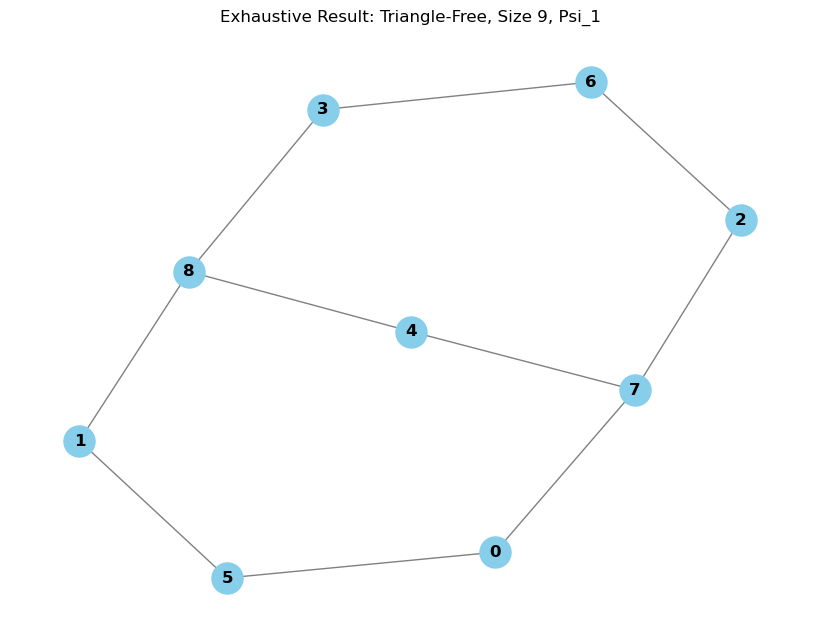

In [8]:
# --- INTERACTIVE SECTION ---
# Change these values to run a search
search_k = 9   # Number of vertices
search_n = 1   # Property Psi_n

results = run_exhaustive_search(k=search_k, n=search_n, limit=1)

if results:
    draw_graph(results[0], f"Exhaustive Result: Triangle-Free, Size {search_k}, Psi_{search_n}")

## 2. Monte Carlo Search

This method generates random Erdos-Renyi graphs and checks for the property. It is faster for finding existence in larger sizes but does not guarantee finding one if probabilities are low.

You can optionally enforce the **triangle-free** constraint.

In [ ]:
def run_monte_carlo_search(n, start_size=10, max_size=20, p=0.5, max_attempts=1000, enforce_triangle_free=True):
    """
    Randomly searches for graphs satisfying Psi_n.
    
    Args:
        n (int): Parameter for property Psi_n.
        start_size (int): Minimum vertices.
        max_size (int): Maximum vertices.
        p (float): Edge probability for Erdos-Renyi.
        max_attempts (int): Attempts per size.
        enforce_triangle_free (bool): If True, discards graphs with triangles.
    """
    print(f"--- Monte Carlo Search for Psi_{n} (Triangle-Free: {enforce_triangle_free}) ---")
    
    for N in range(start_size, max_size + 1):
        print(f"Checking graphs of size N={N}...")
        for i in range(max_attempts):
            G = nx.erdos_renyi_graph(N, p)
            
            if enforce_triangle_free:
                # Check if triangles exist
                # nx.triangles(G) returns a dict of triangle counts per node
                if sum(nx.triangles(G).values()) > 0:
                    continue
            
            # Use the shared check_properties function
            if check_properties(G, n):
                print(f"Success! Found a graph at N={N}, attempt {i+1}")
                return G
                
        print(f"No graph found for N={N} after {max_attempts} attempts.")
    
    print("Could not find a graph within constraints.")
    return None

In [ ]:
# --- INTERACTIVE SECTION ---
mc_n = 2
mc_start = 8
mc_end = 15

random_result = run_monte_carlo_search(n=mc_n, start_size=mc_start, max_size=mc_end, enforce_triangle_free=True)

if random_result:
    draw_graph(random_result, f"Monte Carlo Result: Psi_{mc_n}")